In [52]:
#Importing Libraries
import pandas as pd 
import datetime 
import numpy as np
import scipy.stats

import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas import DataFrame
import itertools
from math import sqrt
from scipy.stats import norm
#For optimization
import timeit
%matplotlib inline

In [53]:
#Start date and End date is refers to time period for fetching the data using the Pandas dataframe API
#We have selected data for atleast 2 years to 
start_date = datetime.datetime(2016, 12, 15)
end_date = datetime.datetime(2017, 12, 14)

#Source is yahoo finance
source = 'yahoo' 

In [54]:
#We read each ticker and download information from start to end date
all_data = {ticker:web.DataReader(ticker,source,start_date,end_date)
            for ticker in ["BTC-USD", "LTC-USD", "BCH-USD","ETH-USD", "IOT-USD", "XRP-USD", "Dash-USD"]}

In [55]:
#We store only Adjusted Close price in a seperate dataset for analysis
ticker_price = pd.DataFrame({ticker: data['Adj Close']
                                  for ticker, data in all_data.items()})

In [56]:
#Shape of the Ticker dataframe
ticker_price.shape

(366, 7)

In [57]:
#Saving the csv file for non-redundant data fetching
ticker_price.to_csv("ticker_price.csv")
#ticker_price = pd.read_csv("ticker_price.csv")

In [68]:
#Function to generate geometric brownian motion/ Monte Carlo Simulation
def Monte_Carlo_Sim (N, mu, sigma, S0, dt = 1):        
    X = np.random.normal(mu * dt, sigma* np.sqrt(dt), N) #standard brownian motion using normal distribution
    X = np.cumsum(X) #We perform cumulative sum generated by normal distribution
    S = S0 * np.exp(X) #geometric brownian motion
    N = 100
    return S

#Choosing date range as per the time period
dates = pd.date_range('2017-12-12', '2018-12-12')
D = (dates.max()-dates.min()).days / 365
N = dates.size
dt = D/N

#Number of Simulations for the process 
m = 100

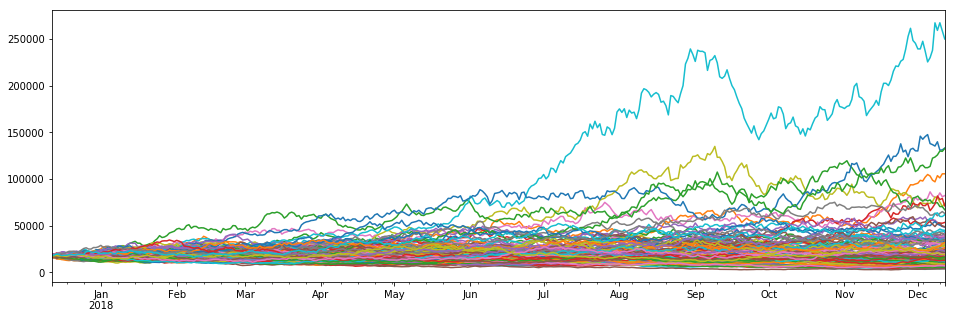

5% quantile = 18841.7363088
Median Value in US$= 36041.7436017
95% quantile = 49195.1083887
0:00:01.429979


In [69]:
#Using the initial value of the price,we generate plots for each bitcoin with iteration of 1000.
start_time_timeit = datetime.datetime.now()
start_price_BTC = ticker_price["BTC-USD"][-1]
for i in range(m):
    btc = pd.Series(Monte_Carlo_Sim(N, mu = 0.20, sigma=0.74, S0=start_price_BTC, dt = dt), index=dates)
    btc.plot(figsize=(16,5))
plt.show()
print("5% quantile =",np.percentile(btc,5))
print("Median Value in US$=",np.percentile(btc,50))
print("95% quantile =",np.percentile(btc,95))
##For optimization
print(datetime.datetime.now()- start_time_timeit)

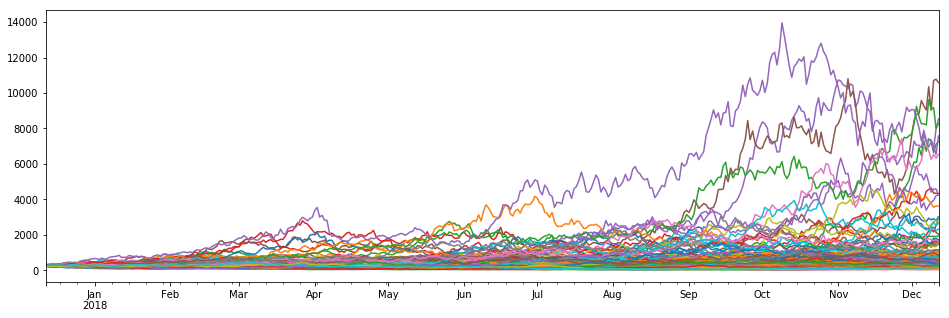

5% quantile = 62.9778235
Median Value in US$= 154.488839733
95% quantile = 324.070650561
0:00:01.269471


In [70]:
# Using the initial value of the price, we generate plots for each Litecoin with iteration of 1000.
start_time_timeit = datetime.datetime.now()
start_price_LTC = ticker_price["LTC-USD"][-1]
for i in range(m):
    ltc = pd.Series(Monte_Carlo_Sim(N, mu = 0.75, sigma=1.40, S0=start_price_LTC,dt =dt), index=dates)
    ltc.plot(figsize=(16,5))    
plt.show()
print("5% quantile =",np.percentile(ltc,5))
print("Median Value in US$=",np.percentile(ltc,50))
print("95% quantile =",np.percentile(ltc,95))
print(datetime.datetime.now()- start_time_timeit)

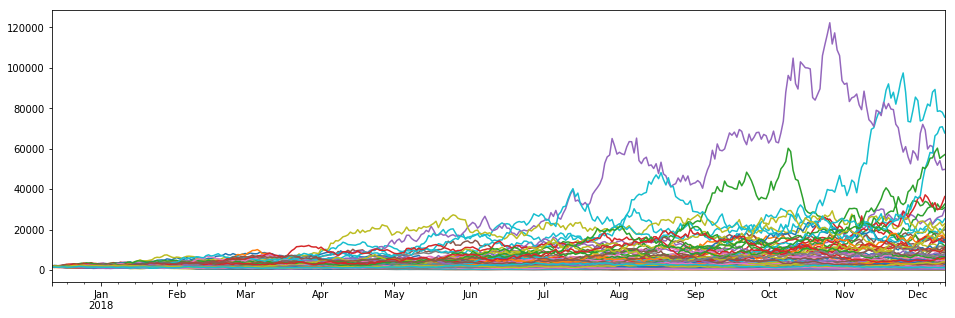

5% quantile = 1092.38734206
Median Value in US$= 1546.16300662
95% quantile = 3048.2870849


In [71]:
# Using the initial value of the price,we generate plots for each Bitcoin Cash with iteration of 1000.
start_price_BCH = ticker_price["BCH-USD"][-1]
for i in range(m):
    bch = pd.Series(Monte_Carlo_Sim(N, mu = 0.76, sigma=1.40, S0=start_price_BCH, dt =dt), index=dates)
    bch.plot(figsize=(16,5))    
plt.show()
print("5% quantile =",np.percentile(bch,5))
print("Median Value in US$=",np.percentile(bch,50))
print("95% quantile =",np.percentile(bch,95))

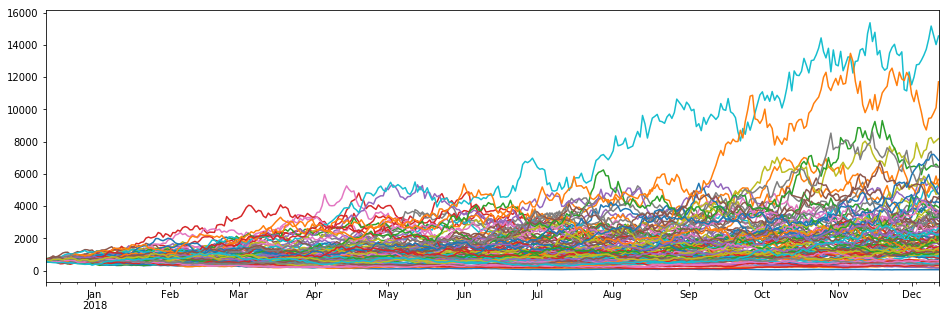

5% quantile = 346.313496662
Median Value in US$= 643.748118517
95% quantile = 2310.75345554


In [72]:
# Using the initial value of the price,we generate plots for each Ethereum with iteration of 1000.
start_price_ETH = ticker_price["ETH-USD"][-1]
for i in range(m):
    eth = pd.Series(Monte_Carlo_Sim(N, mu = 0.86, sigma=1.12, S0=start_price_ETH, dt = dt), index=dates)
    eth.plot(figsize=(16,5))    
plt.show()
print("5% quantile =",np.percentile(eth,5))
print("Median Value in US$=",np.percentile(eth,50))
print("95% quantile =",np.percentile(eth,95))

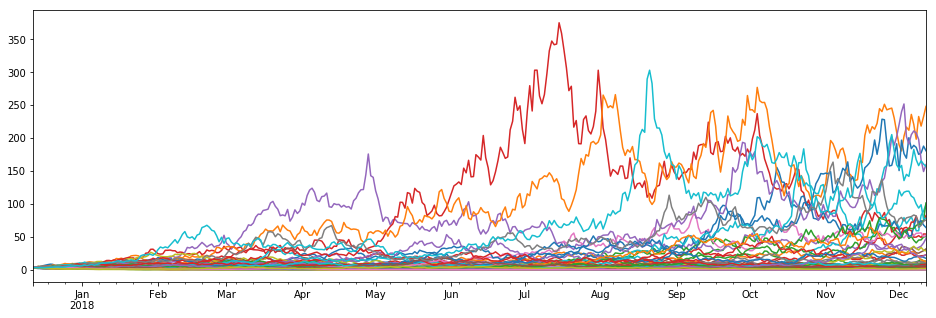

5% quantile = 6.15180495196
Median Value in US$= 48.4957740498
95% quantile = 177.552098557


In [73]:
# Using the initial value of the price,we generate plots for each IOTA with iteration of 1000.
start_price_IOT = ticker_price["IOT-USD"][-1]
for i in range(m):
    iot = pd.Series(Monte_Carlo_Sim(N, mu = 0.05, sigma=1.95, S0=start_price_IOT, dt = dt), index=dates)
    iot.plot(figsize=(16,5))    
plt.show()
print("5% quantile =",np.percentile(iot,5))
print("Median Value in US$=",np.percentile(iot,50))
print("95% quantile =",np.percentile(iot,95))

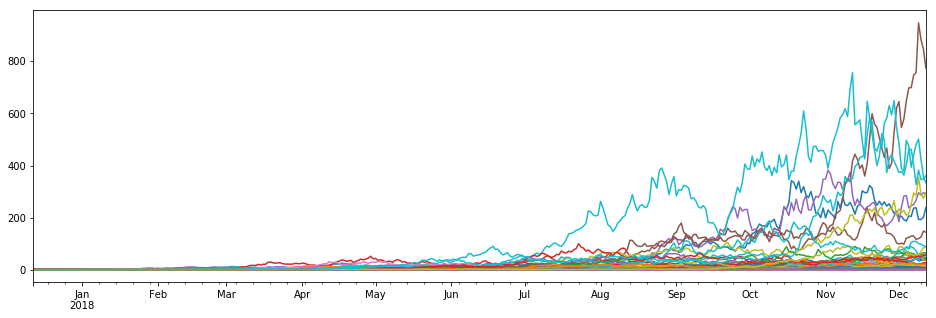

5% quantile = 1.08522904157
Median Value in US$= 31.9070597105
95% quantile = 97.6359600304


In [74]:
# Using the initial value of the price,we generate plots for each Ripple with iteration of 1000.
start_price_XRP = ticker_price["XRP-USD"][-1]
for i in range(m):
    xrp = pd.Series(Monte_Carlo_Sim(N, mu = 1.18, sigma=2.20, S0=start_price_XRP, dt =dt), index=dates)
    xrp.plot(figsize=(16,5))    
plt.show()
print("5% quantile =",np.percentile(xrp,5))
print("Median Value in US$=",np.percentile(xrp,50))
print("95% quantile =",np.percentile(xrp,95))

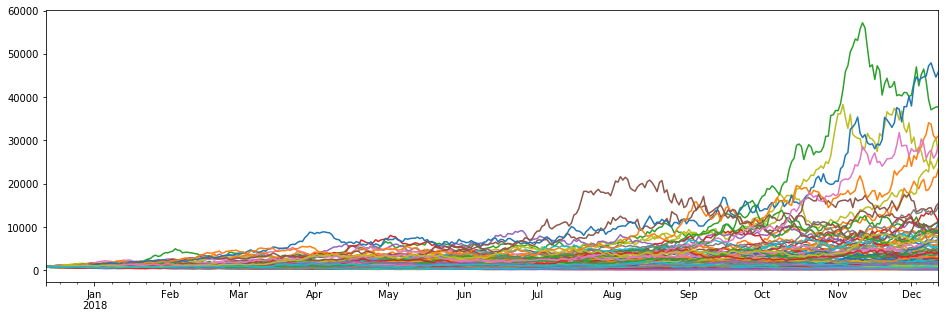

5% quantile = 585.901484298
Median Value in US$= 954.515182208
95% quantile = 1568.42461361


In [75]:
# Using the initial value of the price,we generate plots for each Dash Coin with iteration of 1000.
start_price_Dash = ticker_price["Dash-USD"][-1]
for i in range(m):
    bch = pd.Series(Monte_Carlo_Sim( N, mu= 0.94, sigma=1.18, S0=start_price_Dash, dt = dt), index=dates)
    bch.plot(figsize=(16,5))    
plt.show()
print("5% quantile =",np.percentile(bch,5))
print("Median Value in US$=",np.percentile(bch,50))
print("95% quantile =",np.percentile(bch,95))